In [6]:


%load_ext autoreload
%autoreload 2
from LSTM_model import *
import pandas as pd
import seaborn as sns
import numpy as np
import pickle

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/My Drive/COVID')

Mounted at /content/gdrive


In [7]:
proviences = ["CA-QC","CA-ON","CA-AB","CA-BC","CA-MB","CA-SK","CA-NS","CA-NB","CA-NL"]

Getting the processed data containing both Google mobility and number of cases in canada provinces

In [8]:
pkl_file = open('canada_processed_data.pkl', 'rb')
data = pickle.load(pkl_file)
data_t = data[:,:185]
data_v = data

In [9]:
data_frame = pd.DataFrame(data[3])
data_frame.columns = ["cases","deaths","recoveries","Grocery & pharmacy","Parks","Transit stations","Retail & recreation","Residential","work place"]

In [10]:
data_frame

,cases,deaths,recoveries,Grocery & pharmacy,Parks,Transit stations,Retail & recreation,Residential,work place
0,1.0,0.0,0.0,1.0,0.0,-4.0,2.0,-4.0,0.0
1,1.0,0.0,0.0,12.0,2.0,41.0,10.0,-2.0,-2.0
2,1.0,0.0,0.0,5.0,9.0,114.0,-21.0,-67.0,12.0
3,1.0,0.0,0.0,6.0,8.0,60.0,1.0,1.0,0.0
4,1.0,0.0,0.0,6.0,6.0,54.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
249,497.0,2.0,5358.0,-16.0,6.0,61.0,-40.0,-28.0,9.0
250,497.0,2.0,5358.0,-17.0,5.0,55.0,-43.0,-28.0,10.0
251,497.0,2.0,5358.0,-22.0,-2.0,-9.0,-46.0,-34.0,11.0
252,817.0,3.0,498.0,-15.0,8.0,41.0,-36.0,-11.0,5.0


Setting the sliding window and getting training set and validation set. 

In [11]:
train_data,train_label,val_data,val_label = prepare_window_train_val_multivariate(data_t,data_v,7)

Checkin the corrolation of number of cases with google mobility

In [12]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    '''
    Takes df, a dependant variable as str
    Returns a heatmap of all independent variables' correlations with dependent variable 
    '''
    plt.figure(figsize=(8, 10))
    plt.title = "hello"
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
                    
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 
    return g

CA-QC
CA-ON
CA-AB
CA-BC
CA-MB
CA-SK
CA-NS
CA-NB
CA-NL


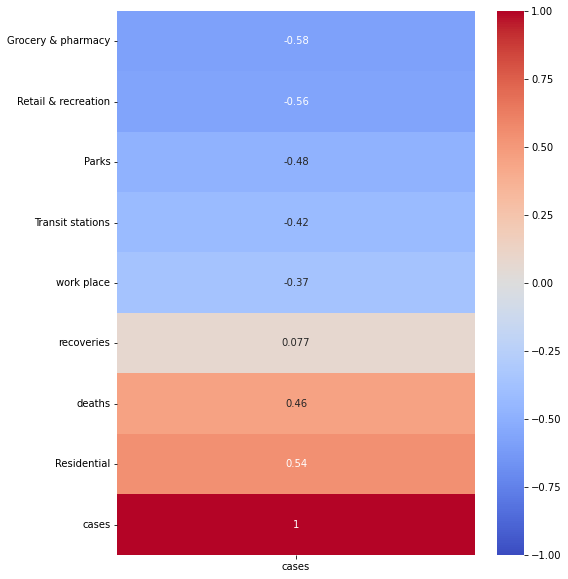

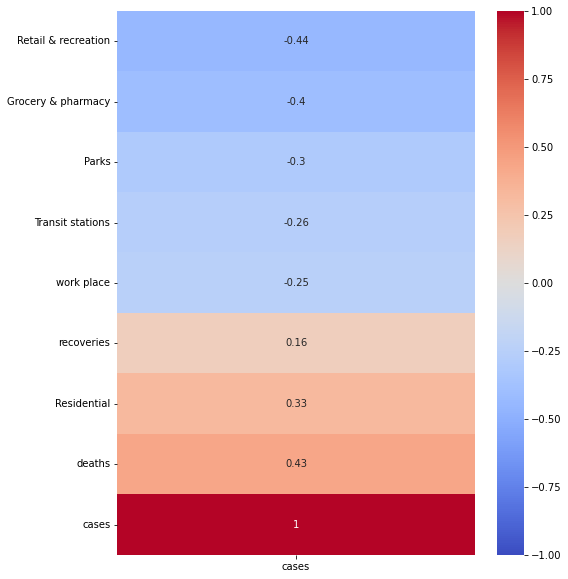

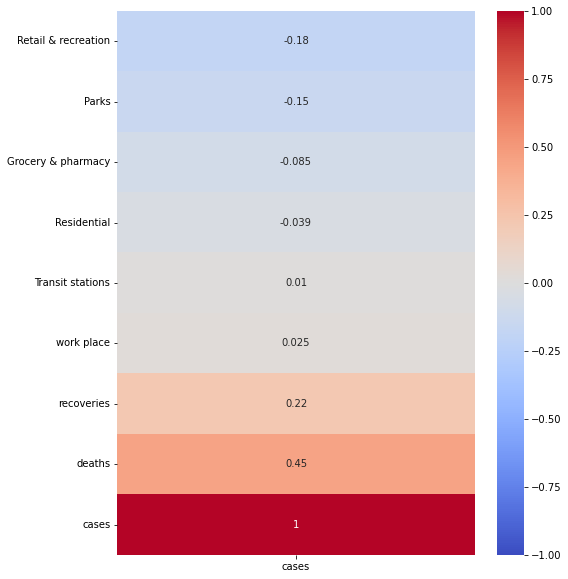

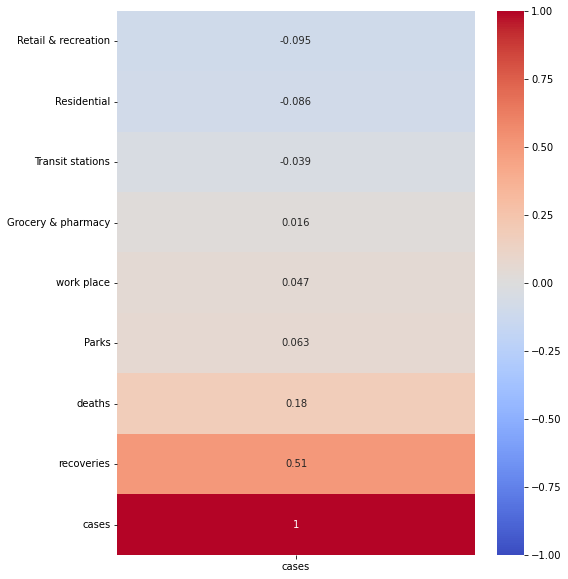

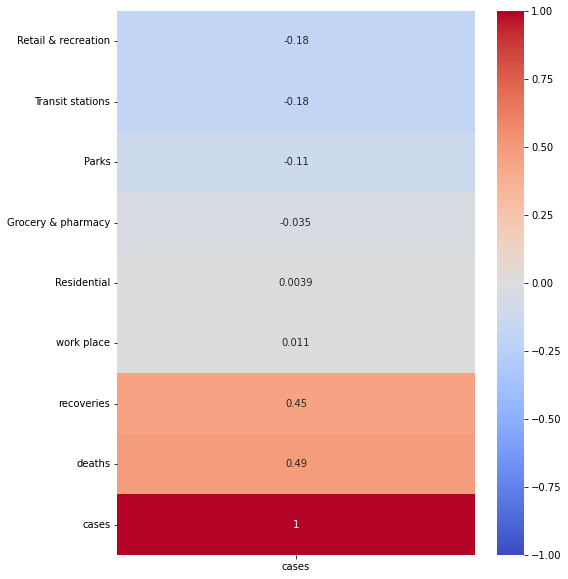

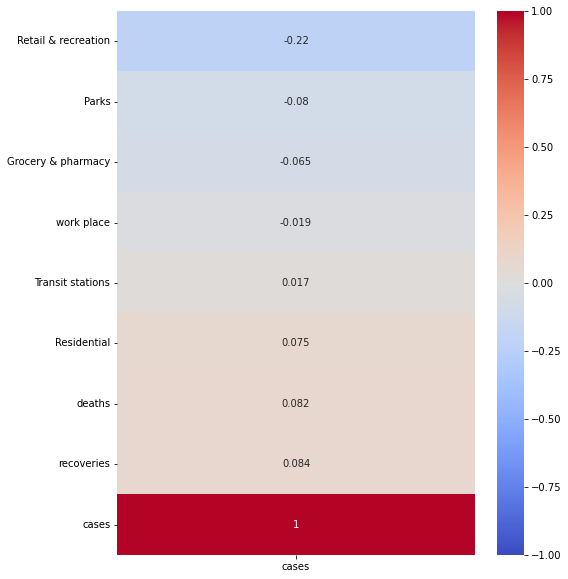

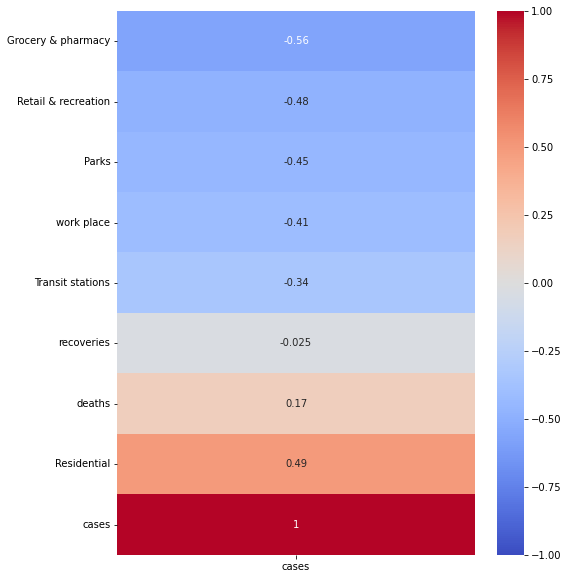

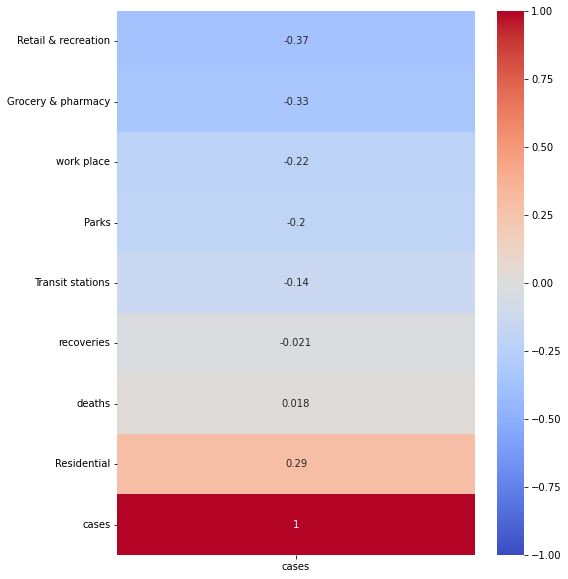

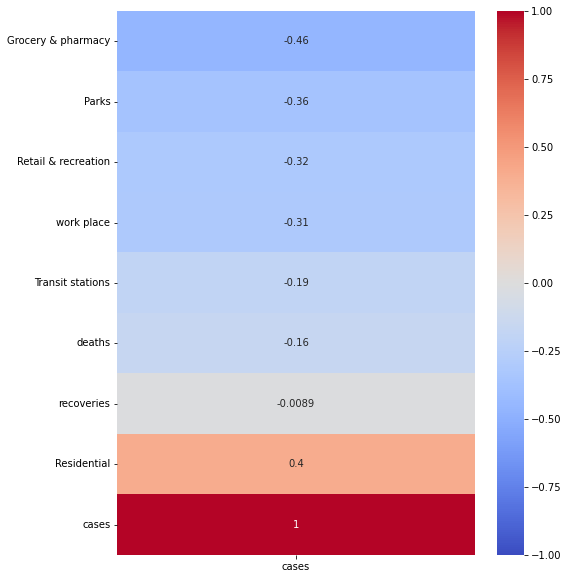

In [13]:
for i in range(9):
  data_frame = pd.DataFrame(data[i])
  print(proviences[i])
  data_frame.columns = ["cases","deaths","recoveries","Grocery & pharmacy","Parks","Transit stations","Retail & recreation","work place","Residential"]
  heatmap_numeric_w_dependent_variable(data_frame,"cases")

CA-QC
CA-ON
CA-AB
CA-BC
CA-MB
CA-SK
CA-NS
CA-NB
CA-NL


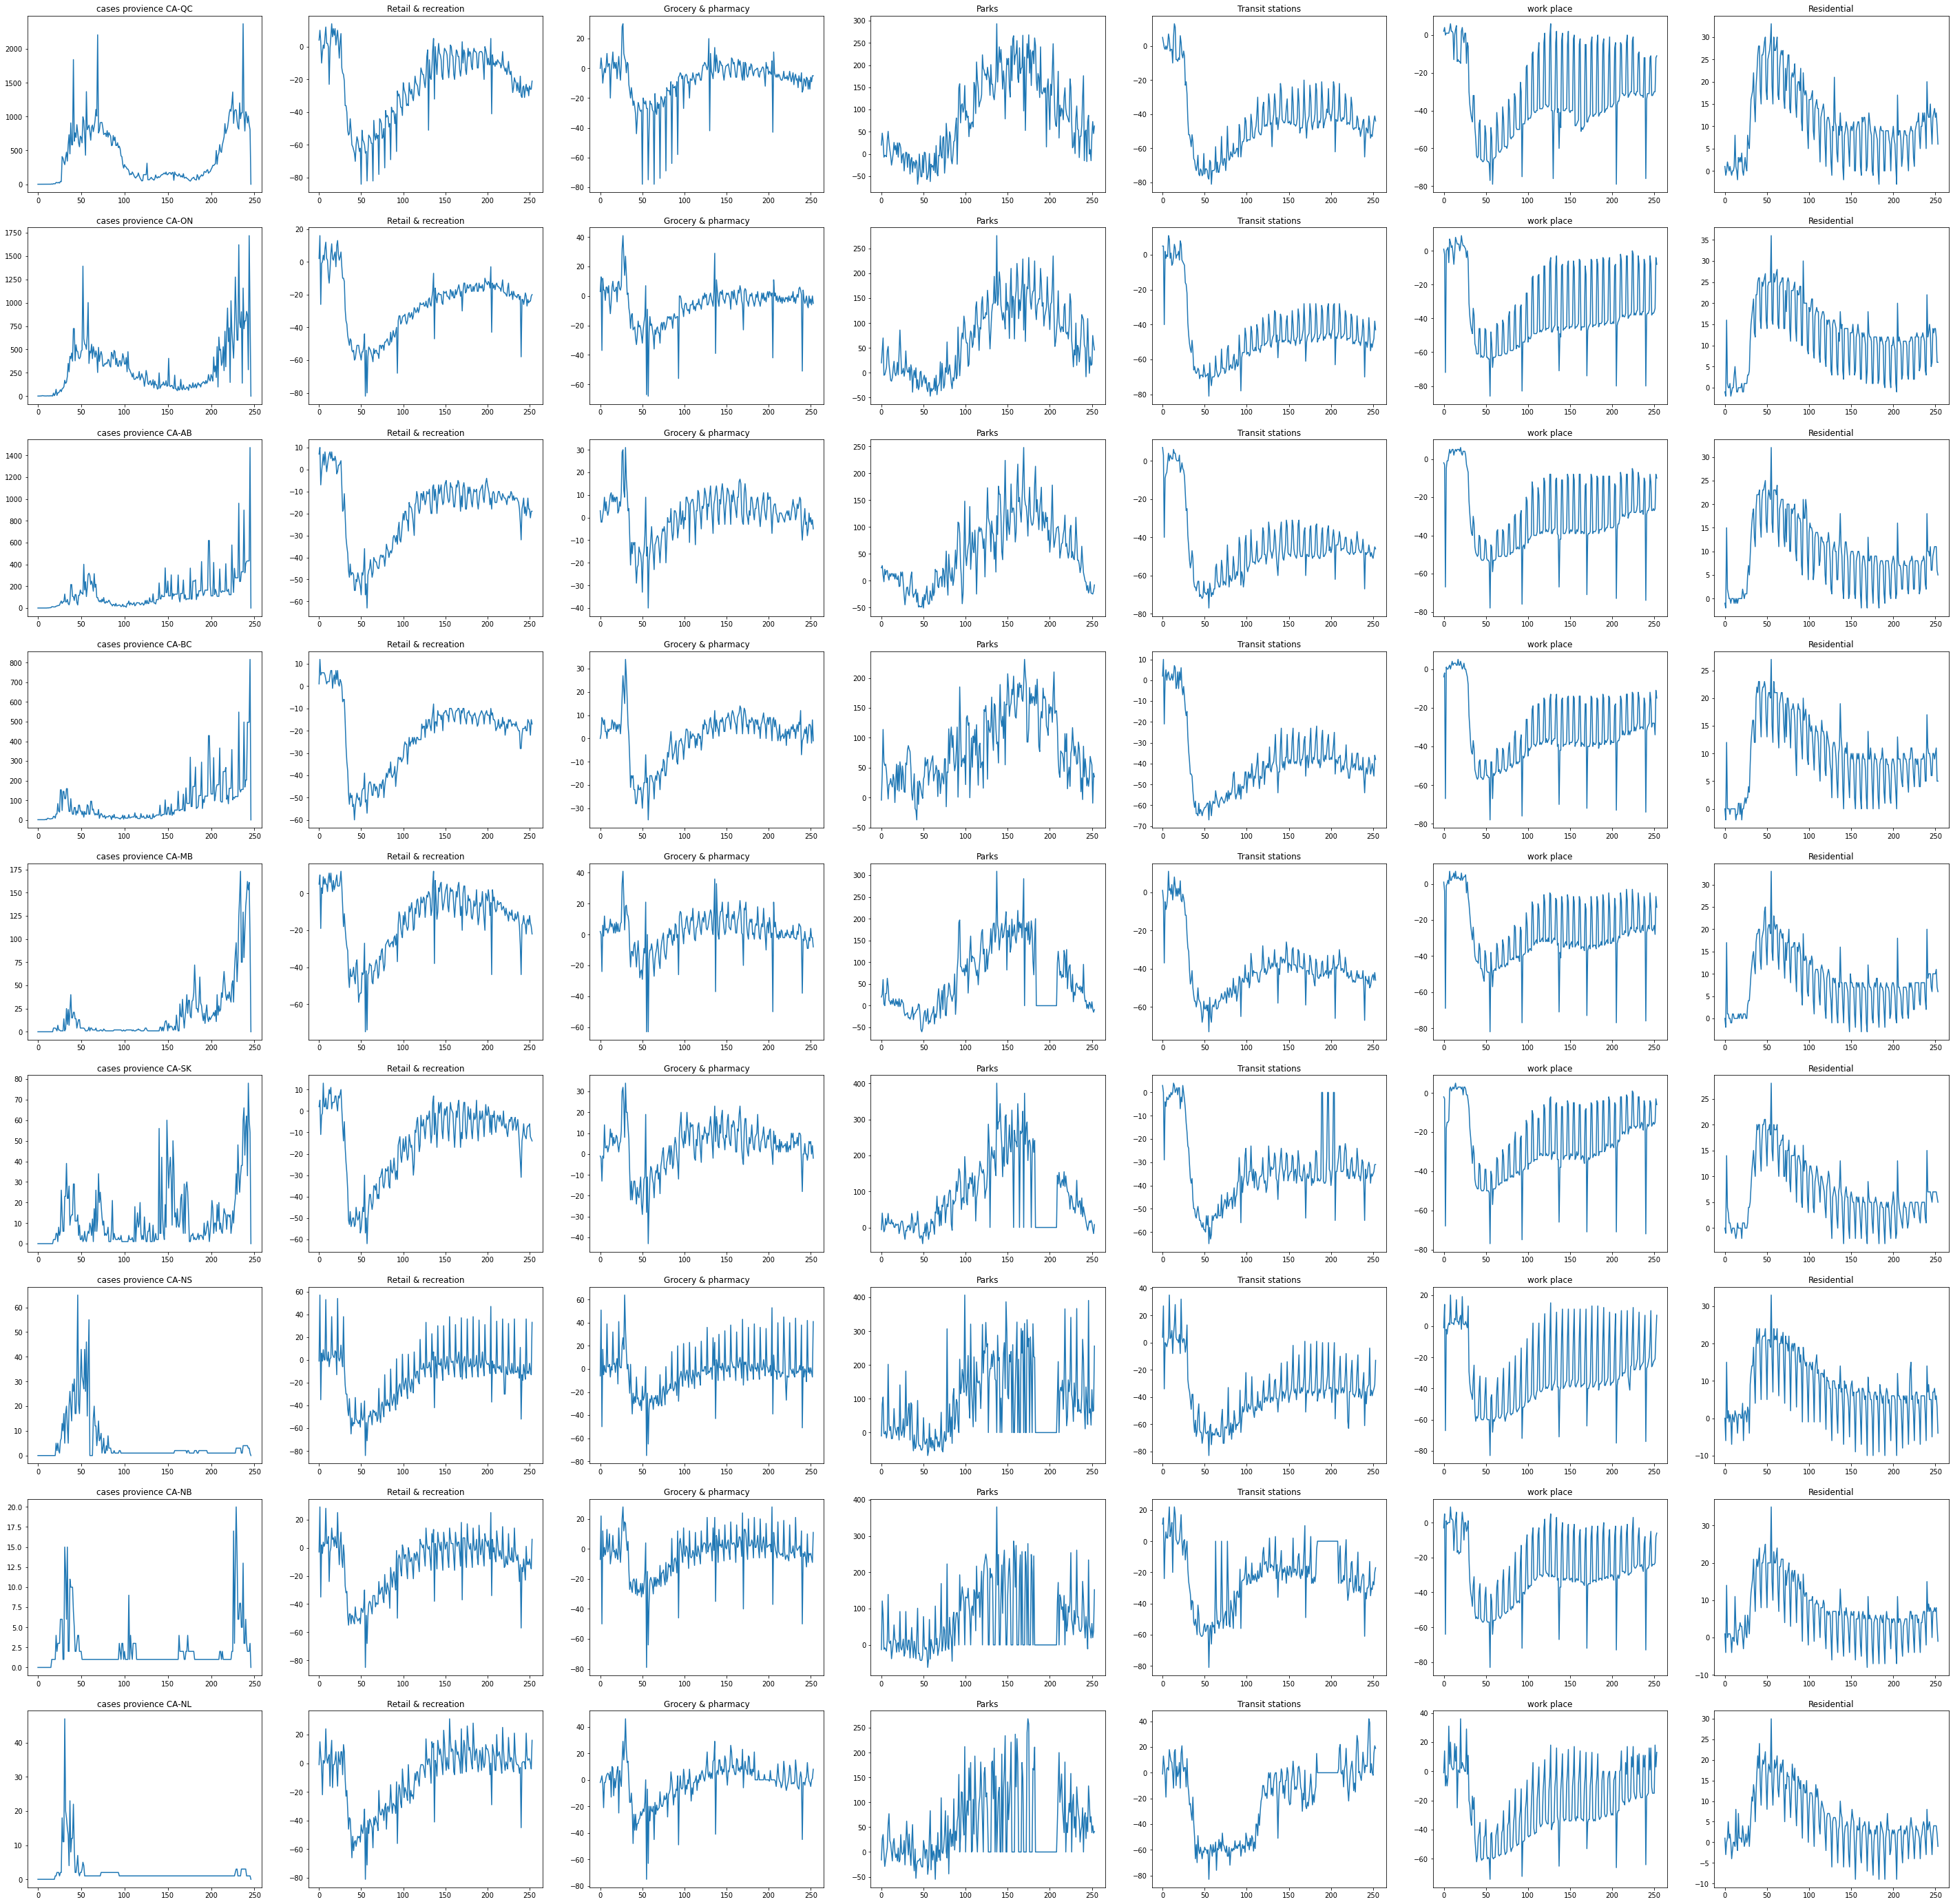

In [14]:
fig, axs = plt.subplots(9,7)
fig.set_figheight(50)
fig.set_figwidth(50)

for i in range(9):
  axs[i,0].plot(np.arange(len(val_data[i])),val_label[i])
  axs[i,0].set_title(f"cases provience {proviences[i]}")
  axs[i,1].plot(np.arange(len(data[i])),data[i,:,3])
  axs[i,1].set_title("Retail & recreation")

  axs[i,2].plot(np.arange(len(data[i])),data[i,:,4])
  axs[i,2].set_title("Grocery & pharmacy")

  axs[i,3].plot(np.arange(len(data[i])),data[i,:,5])
  axs[i,3].set_title("Parks")

  axs[i,4].plot(np.arange(len(data[i])),data[i,:,6])
  axs[i,4].set_title("Transit stations")
  axs[i,5].plot(np.arange(len(data[i])),data[i,:,7])
  axs[i,5].set_title("work place")
  axs[i,6].plot(np.arange(len(data[i])),data[i,:,8])
  axs[i,6].set_title("Residential")

  data_frame = pd.DataFrame(data[i])
  print(proviences[i])


In [15]:
train_label[130]

89.0

In [16]:
np.random.seed(51)
np.random.shuffle(train_data)
np.random.seed(51)
np.random.shuffle(train_label)


Get the LSTM model

In [17]:
model = get_model(1e-7)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train the model

In [18]:
history = model.fit(train_data,train_label, epochs=200,batch_size=64)


Epoch 1/200
26/26 [==============================] - 7s 16ms/step - loss: 1217.9786 - mae: 1218.4785
Epoch 2/200
26/26 [==============================] - 0s 16ms/step - loss: 529.7487 - mae: 530.2482
Epoch 3/200
26/26 [==============================] - 0s 17ms/step - loss: 356.4554 - mae: 356.9548
Epoch 4/200
26/26 [==============================] - 0s 17ms/step - loss: 399.8432 - mae: 400.3430
Epoch 5/200
26/26 [==============================] - 0s 16ms/step - loss: 283.6204 - mae: 284.1203
Epoch 6/200
26/26 [==============================] - 0s 16ms/step - loss: 223.3135 - mae: 223.8131
Epoch 7/200
26/26 [==============================] - 0s 17ms/step - loss: 229.3197 - mae: 229.8189
Epoch 8/200
26/26 [==============================] - 0s 16ms/step - loss: 197.3933 - mae: 197.8923
Epoch 9/200
26/26 [==============================] - 0s 16ms/step - loss: 204.8335 - mae: 205.3331
Epoch 10/200
26/26 [==============================] - 0s 17ms/step - loss: 175.2361 - mae: 175.7359
Epoch 1

Test model on the second wave of covid 19

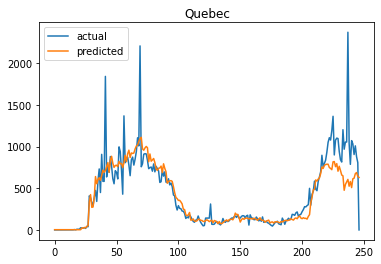

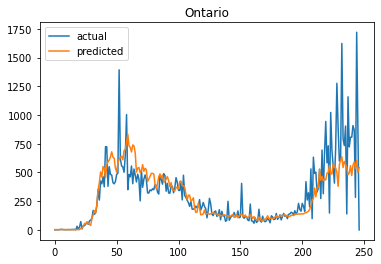

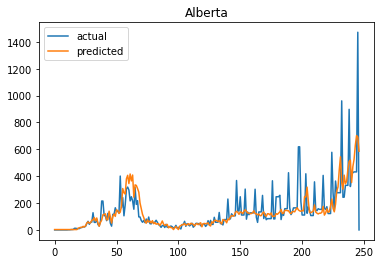

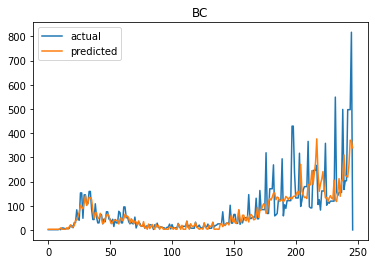

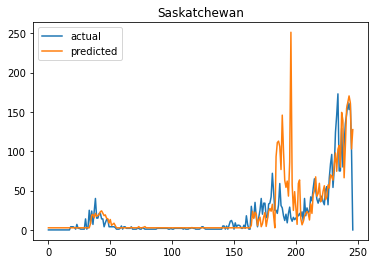

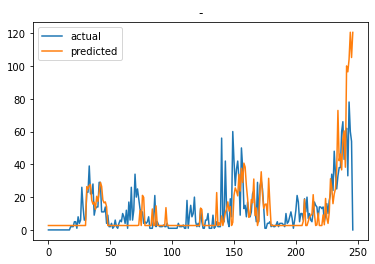

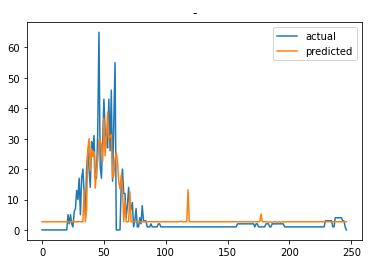

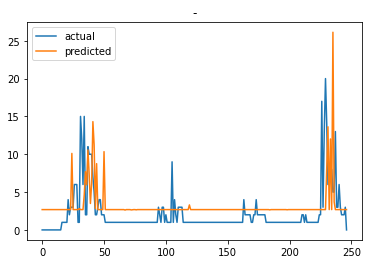

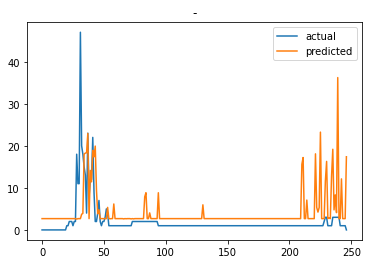

In [23]:
titles = ["Quebec", "Ontario", "Alberta", "BC", "Saskatchewan","-","-","-","-","-","-,","-","-","-","-"]
index = 0
for (val,y) in zip(val_data,val_label):
    fig, ax = plt.subplots(1)
    fore = model.predict(val)
    ax.plot(np.arange(len(y)),y,label = "actual")
    ax.plot(np.arange(len(fore)),fore,label ="predicted")
    ax.set_title(titles[index])
    ax.legend()
    index+=1

In [24]:
for (val,y) in zip(val_data,val_label):
    model.evaluate(val,y)

8/8 [==============================] - 0s 4ms/step - loss: 2.5539 - mae: 3.0429
